In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')

from eboss_figs import (plot_nz, mollweide, p0_demo, plot_overdensity,
                        nnbarchi2pdf_mocks_data, p0mocks, sigP0mocks, plot_deltaNqso, 
                        pcc_wnn_nchains, table_chi2, nbarnstar, p0nstar, nbarlinnn, p0linnn,
                        cellchi2pdf_mocks_data, nbarnside, p0nside, nbar_covmax)

# mollweide3maps, 
#                         radec_zbins, kmean_jackknife, 
#                         train_val_losses_256vs512, train_val_losses_allvsknown,
#                         mollweide_templates, stdwnn_epoch, 
#                         pcc_wnn_nchains,
#                         cell_ngc_main_nchain1, cell_ngc_main_nchain2,
#                        p0_512vs256_knownvsall_ngcvssgc, p2_512vs256_knownvsall_ngcvssgc,
#                        chi2_from_nbar, p0_demo

In [7]:
fig_path = '/home/mehdi/data/eboss/figs/'

In [8]:
plt.rc('font', size=15)

## n(z)

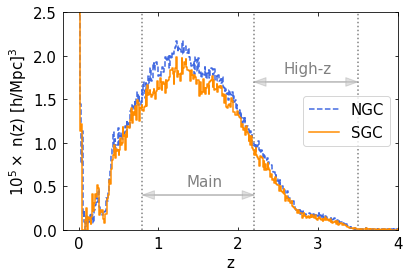

In [6]:
_ = plot_nz(fig_path + 'eboss_data_nz.pdf')

## Mollweide

column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:107: RuntimeWarning: divide by zero encountered in true_divide
  ngal_dens = ngal_tot_f / (frac_tot_f * area_1pix)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:107: RuntimeWarning: invalid value encountered in true_divide
  ngal_dens = ngal_tot_f / (frac_tot_f * area_1pix)


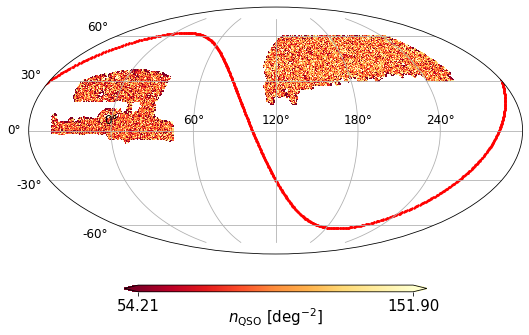

In [7]:
_ = mollweide(fig_path + 'eboss_nqso_mollweide.pdf')

/home/mehdi/data/eboss/data/v7_2/3.0/catalogs/


column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/healpy/pixelfunc.py:481: RuntimeWarning: invalid value encountered in _ang2pix_ring
  return pixlib._ang2pix_ring(nside, theta, phi)
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:823: RuntimeWarning: divide by zero encountered in true_divide
  ngal_dens = ngal_tot / (frac_tot * pix_area)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:823: RuntimeWarning: invalid value encountered in true_divide
  ngal_dens = ngal_tot / (frac_tot * pix_area)
/home/mehdi/github/LSSutils/notebooks/eboss_figs.py:824: RuntimeWarning: divide by zero encountered in true_divide
  ngal_dens_ = ngal_tot_ / (frac_tot_ * pix_area)
/home/mehdi/g

0.0 13.213747991494973


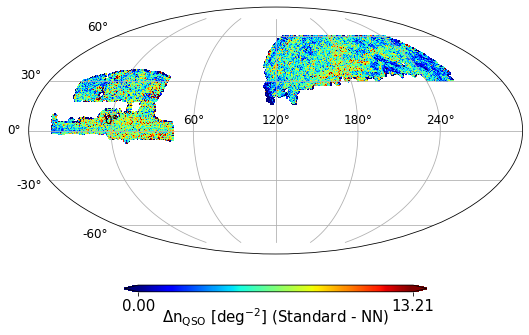

In [8]:
plot_deltaNqso(fig_path + 'eboss_dnqso_mollweide.pdf')

## power spectrum monopole

In [7]:
plt.rc('font', size=14)

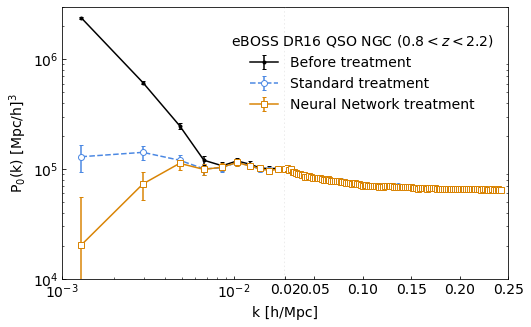

In [8]:
p0_demo(fig_path + 'p0_ngc_main.pdf', cap='NGC', show_nn=True, sample='main')

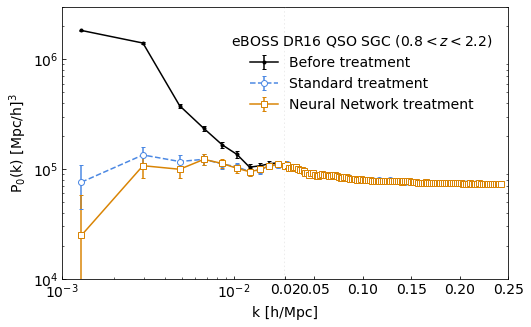

In [9]:
p0_demo(fig_path + 'p0_sgc_main.pdf', cap='SGC', show_nn=True, sample='main')

In [ ]:
#p0_demo(fig_path + 'p0_ngc_highz_all.pdf', cap='NGC', show_nn=True, sample='highz', method='all')

In [ ]:
#p0_demo(fig_path + 'p0_sgc_highz.pdf', cap='SGC', show_nn=True, sample='highz')

## Density Contrast

In [10]:
plt.rc('font', size=14)

nmocks: 1000
nmocks: 999
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8
nbins: 8


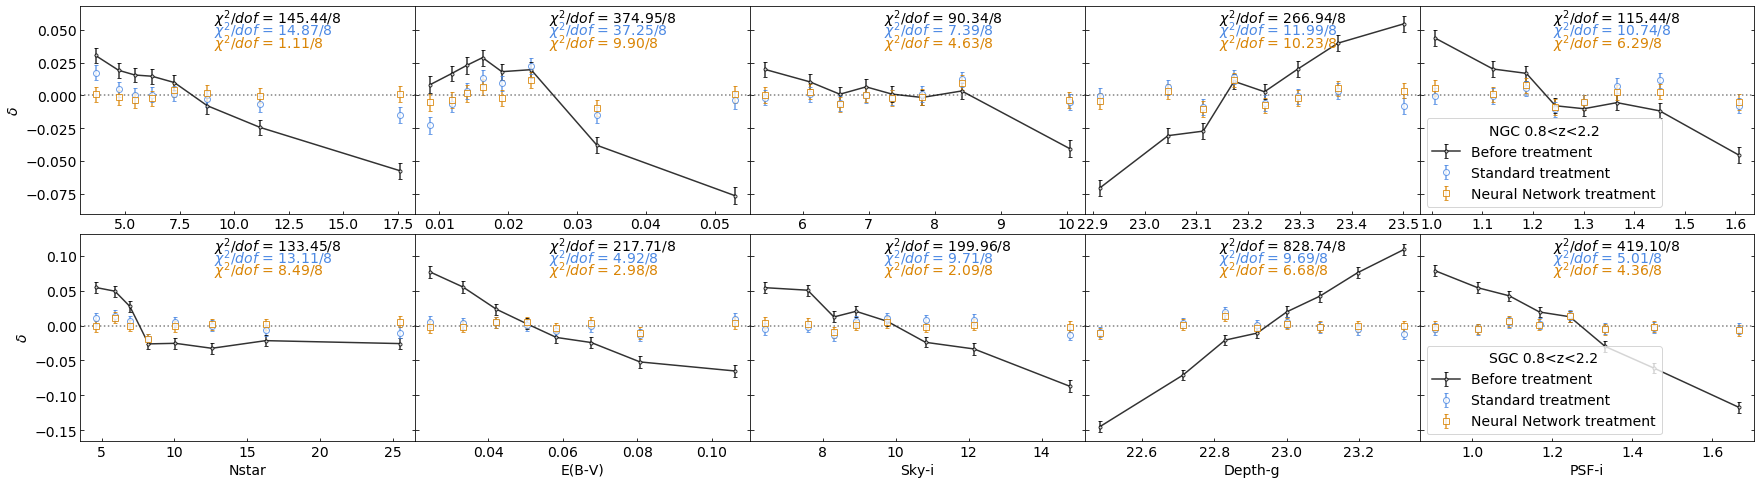

In [11]:
plot_overdensity(fig_path + 'nnbar_main_known.pdf', 'main')

In [ ]:
#plot_overdensity(fig_path + 'nnbar_highz_known.pdf', 'highz')

## cov matrix from nbar mocks

len(nbars): 1000 NGC
(1000, 136)


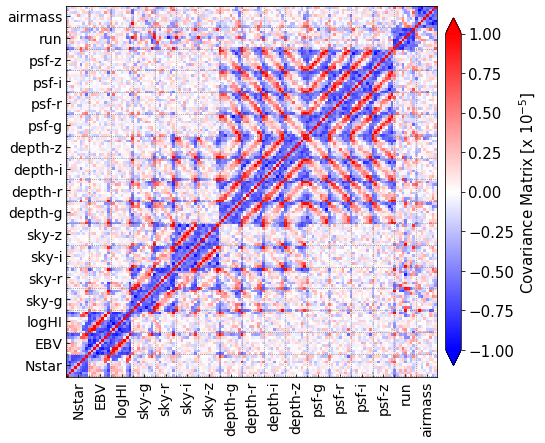

In [8]:
nbar_covmax(fig_path + 'nnbar_covmax_ngc_512.pdf')

## chi2 pdf from null mocks vs data

In [12]:
plt.rc('font', size=13)

len(nbars): 1000 NGC
(1000, 136)
1000
[ 84.58764768  97.31549009 108.2897478  177.96379768 196.78819026
 231.86771922]
{'noweight': 1344.9104573772056, 'standard': 218.09023055116995, 'nn': 151.71384438971836}
141.0 +- 21.1
7.383262733208004


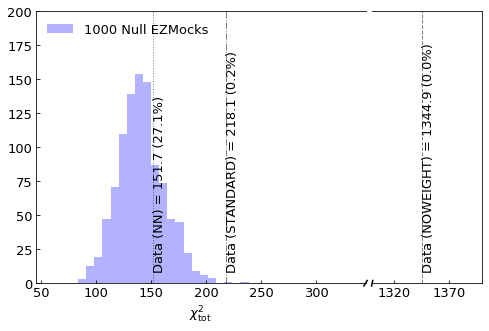

In [13]:
nnbarchi2pdf_mocks_data(fig_path + 'nnbar_chi2pdf_ngc_main.pdf', 
                        cap='NGC', 
                        xlim1=(45., 345), # 300
                        xlim2=(1300, 1400), # 100
                        xticks2=[1320, 1370]) # 50

len(nbars): 999 SGC
(999, 136)
999
[ 82.61783039  96.65861655 106.9925034  179.1638982  198.7839452
 248.19013258]
{'noweight': 1942.9844242222607, 'standard': 132.4890413320245, 'nn': 116.30955373894176}
141.4 +- 22.0
7.687665197131424


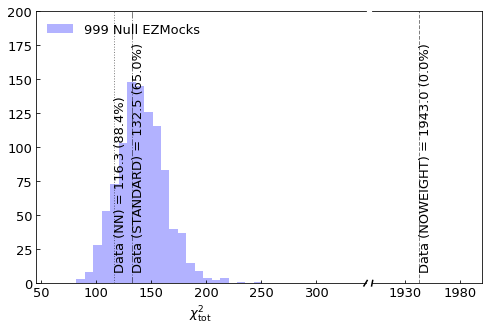

In [14]:
nnbarchi2pdf_mocks_data(fig_path + 'nnbar_chi2pdf_sgc_main.pdf', 
                        cap='SGC', 
                        xlim1=(45., 345), # 300
                        xlim2=(1900, 2000), # 100
                        xticks2=[1930, 1980]) # 50

# Cross power

1000
[   3.04366273    8.12090232   14.63299218  185.81685854  344.4673862
 2295.03016076]
{'noweight': 211839.38521136367, 'standard': 338.5487416050164, 'nn': 49.76468377687504}
78.7 +- 97.4
34.087596430862924


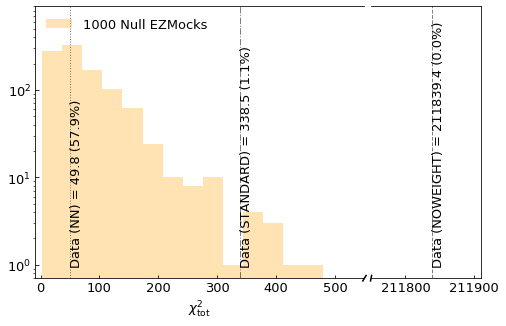

In [15]:
cellchi2pdf_mocks_data(fig_path + 'cell_chi2pdf_ngc_main.pdf', 
                        cap='NGC', 
                        xlim1=(-10., 550.), # 560
                        xlim2=(211750, 211910), # 160
                        xticks2=[211800, 211900]) # 100

999
[   3.00509505    7.63111631   14.00207175  202.54445907  379.23925466
 1135.18345968]
{'noweight': 235587.56317949854, 'standard': 404.2851258720839, 'nn': 53.245872498113556}
78.1 +- 81.6
28.581035400254244


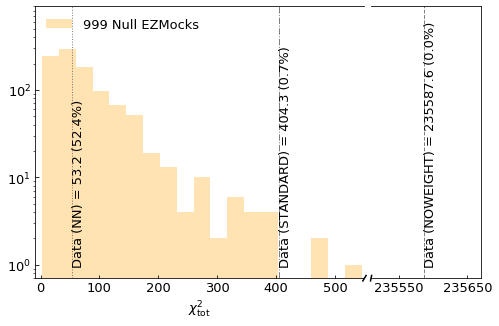

In [16]:
cellchi2pdf_mocks_data(fig_path + 'cell_chi2pdf_sgc_main.pdf', 
                        cap='SGC', 
                        xlim1=(-10., 550.), # 560
                        xlim2=(235510, 235670), # 160
                        xticks2=[235550, 235650]) # 100

# Impact of nstar

In [17]:
plt.rc('font', size=15)

nmocks: 1000
nbins: 8


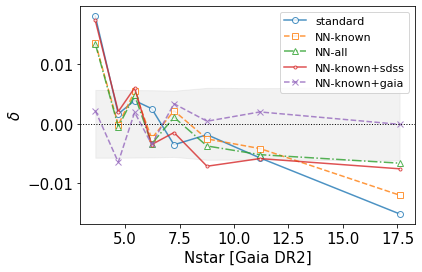

In [20]:
nbarnstar(fig_path + 'eboss_512_nbarnstar_ngc.pdf')

In [21]:
plt.rc('font', size=15)

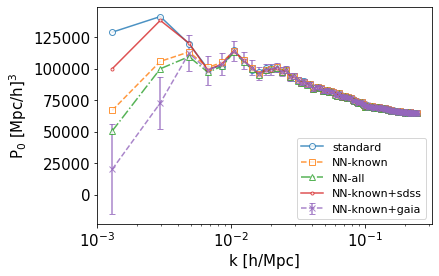

In [17]:
p0nstar(fig_path + 'eboss_512_p0nstar_ngc.pdf')

# NN/Linear methods

In [22]:
plt.rc('font', size=15)

nmocks: 1000
nbins: 8


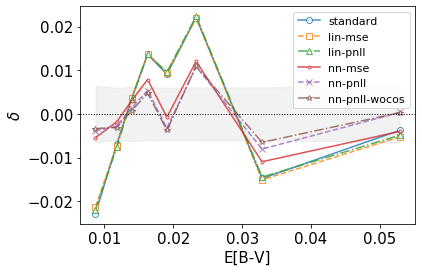

In [23]:
nbarlinnn(fig_path + 'eboss_512_nbarlinnn_ngc.pdf')

In [8]:
plt.rc('font', size=15)

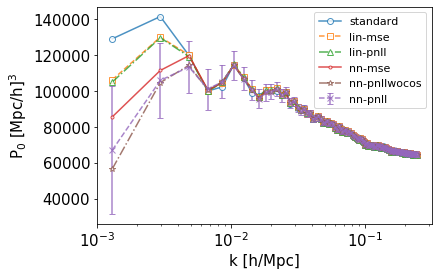

In [9]:
p0linnn(fig_path + 'eboss_512_p0linnn_ngc.pdf')

nmocks: 1000
nbins: 8


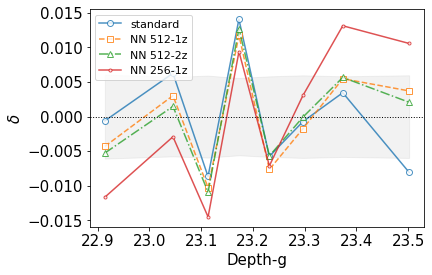

In [24]:
nbarnside(fig_path + 'eboss_512_nbarzsplit_ngc.pdf')

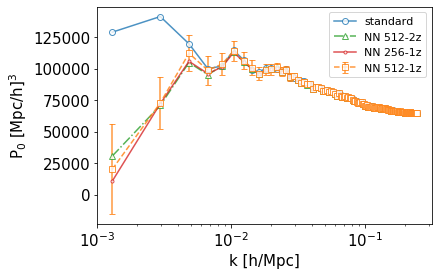

In [12]:
p0nside(fig_path + 'eboss_512_p0split_ngc.pdf')

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from glob import glob
def chi2_fn(y, invcov):
    return np.dot(y, np.dot(invcov, y))    

def read_nnbar(path, ix=None):
    d = np.load(path, allow_pickle=True)
    nnbar = []
    if ix is None:        
        for di in d:
            nnbar.append(di['nnbar']-1)
    else:
        for i in ix:
            di = d[i]
            nnbar.append(di['nnbar']-1)
    return np.array(nnbar).flatten()

def get_chi2t(path, ix, incov):
    nnbar_ = read_nnbar(path, ix)
    return chi2_fn(nnbar_, invcov)

def get_chi2t_mocks(nside, cap, ix):
    path_ = '/home/mehdi/data/eboss/mocks/1.0/measurements/nnbar/'
    mocks = glob(f'{path_}nnbar_{cap}_knownsystot_mainhighz_512_v7_0_*_main_{nside}.npy')
    print('len(nbars):', len(mocks), cap)
    nmocks = len(mocks)
    err_tot = []
    for j, fn in enumerate(mocks):
        err_j = read_nnbar(fn, ix=ix)
        err_tot.append(err_j)            
    err_tot = np.array(err_tot)
    print(err_tot.shape)

    nbins = err_tot.shape[1]
    hartlapf = (nmocks-1. - 1.) / (nmocks-1. - nbins - 2.)
    indices = [i for i in range(nmocks)]
    chi2s = []
    for i in range(nmocks):
        indices_ = indices.copy()    
        indices_.pop(i)
        nbar_ = err_tot[i, :]
        err_ = err_tot[indices_, :]    
        covmax_ = np.cov(err_, rowvar=False)
        invcov_ = np.linalg.inv(covmax_*hartlapf)
        chi2_ = chi2_fn(nbar_, invcov_)
        chi2s.append(chi2_)       

    print(nmocks)
    covmax_ = np.cov(err_tot, rowvar=False)
    hartlapf = (nmocks - 1.) / (nmocks - nbins - 2.)
    invcov_ = np.linalg.inv(covmax_*hartlapf)

    return np.array(chi2s), invcov_

# read covariance matrix
cap = 'NGC'
ix = None # [i for i in range(1, 17)]
chi2mocks, invcov = get_chi2t_mocks('512', cap, ix)
print(np.percentile(chi2mocks, [0, 1, 5, 95, 99, 100]))

len(nbars): 1000 NGC
(1000, 136)
1000
[ 84.58764768  97.31549009 108.2897478  177.96379768 196.78819026
 231.86771922]


In [5]:
path = '/home/mehdi/data/eboss/data/v7_2/3.0/measurements/nnbar/'

chi2d = {}
chi2d['noweight'] = get_chi2t(f'{path}nnbar_{cap}_noweight_mainhighz_512_v7_2_main_512.npy', ix, invcov)
chi2d['standard'] = get_chi2t(f'{path}nnbar_{cap}_knownsystot_mainhighz_512_v7_2_main_512.npy', ix, invcov)
# chi2d['nn'] = get_chi2t(f'{path}nnbar_{cap}_known_mainhighz_512_v7_2_main_512.npy', ix, invcov)
# chi2d['standard2'] = get_chi2t(f'{path}nnbar_NGC_knownsystot_mainhighz_512_v7_2_main_512.npy', ix, invcov)
chi2d['NN 512-1z'] = get_chi2t(f'{path}nnbar_NGC_known_mainhighz_512_v7_2_main_512.npy', ix, invcov)
chi2d['NN 512-2z'] = get_chi2t(f'{path}nnbar_NGC_known_lowmidhighz_512_v7_2_main_512.npy', ix, invcov)
chi2d['NN 256-1z'] = get_chi2t(f'{path}nnbar_NGC_known_mainhighz_256_v7_2_main_512.npy', ix, invcov)

p = '/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/'
# chi2d['standard1'] = get_chi2t(f'{p}nnbar_NGC_knownsystot_mainhighz_512_v7_2_main_512.npy', ix, invcov)
chi2d['lin-mse'] = get_chi2t(f'{p}nnbar_NGC_known_mainlinmse_512_v7_2_main_512.npy', ix, invcov)
chi2d['lin-pnll'] = get_chi2t(f'{p}nnbar_NGC_known_mainlinp_512_v7_2_main_512.npy', ix, invcov)
chi2d['nn-mse'] = get_chi2t(f'{p}nnbar_NGC_known_mainmse_512_v7_2_main_512.npy', ix, invcov)
chi2d['nn-pnll'] = get_chi2t(f'{p}nnbar_NGC_known_mainhighz_512_v7_2_main_512.npy', ix, invcov)
chi2d['nn-pnll-wocos'] = get_chi2t(f'{p}nnbar_NGC_known_mainwocos_512_v7_2_main_512.npy', ix, invcov)
chi2d['nn-pnll-all'] = get_chi2t(f'{p}nnbar_NGC_all_mainhighz_512_v7_2_main_512.npy', ix, invcov)
chi2d['nn-known+gaia'] = get_chi2t(f'{p}nnbar_NGC_known_mainstarg_512_v7_2_main_512.npy', ix, invcov)
chi2d['nn-known+sdss'] = get_chi2t(f'{p}nnbar_NGC_known_mainstar_512_v7_2_main_512.npy', ix, invcov)

In [6]:
chi2d

{'noweight': 1344.9104573772056,
 'standard': 218.09023055116995,
 'NN 512-1z': 151.71384438971836,
 'NN 512-2z': 165.49112880500616,
 'NN 256-1z': 217.58277111197822,
 'lin-mse': 213.5096775526181,
 'lin-pnll': 210.22616927429772,
 'nn-mse': 194.56484328507213,
 'nn-pnll': 163.9677825497929,
 'nn-pnll-wocos': 168.99183860328048,
 'nn-pnll-all': 153.92560206314374,
 'nn-known+gaia': 151.71384438971836,
 'nn-known+sdss': 184.59732910502498}

## Table of chi2

In [ ]:
# table_chi2()y

## P0 of mocks

Cont 1000
Null 1000
Cont+Standard 1000
Null+NN 1000
Cont+NN 1000


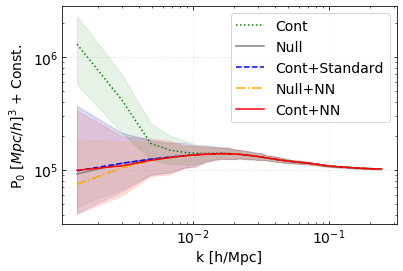

In [16]:
p0mocks(fig_path + 'p0_mocks_ngc.pdf')

## sigP0 mocks

1000
1000
1000
1000
1000
dict_keys(['Cont', 'Null', 'Cont+Standard', 'Null+NN', 'Cont+NN'])


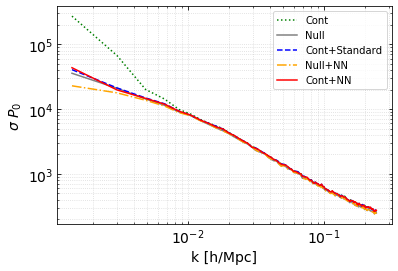

In [17]:
sigP0mocks(fig_path + 'sigp0mocks_ngc.pdf')

## Convergence

In [9]:
plt.rc('font', size=15)

4


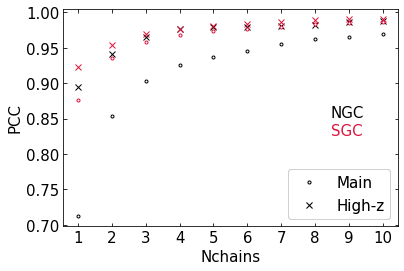

In [10]:
_ = pcc_wnn_nchains(fig_path + 'eboss_512_pccwnn_epoch.pdf', ns='512')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dt = np.load('/home/mehdi/data/alternative/dr8_elg_256_5r.npy', allow_pickle=True).item()

In [3]:
dt.keys()

dict_keys(['test', 'train', 'validation'])

In [4]:
test_ = dt['test']['fold0']
train_ = dt['train']['fold0']
valid_ = dt['validation']['fold0']

In [5]:
import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')
from lssutils.utils import hpix2radec

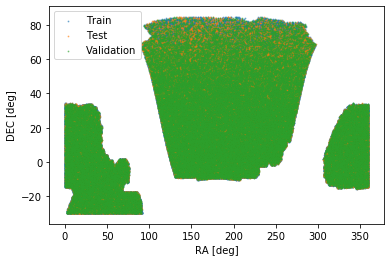

In [26]:
for s,n in zip([train_, test_, valid_],
               ['Train', 'Test', 'Validation']):
    
    radec = hpix2radec(256, s['hpind'])
    #plt.scatter(*radec, 190, marker='H', alpha=0.5, edgecolors='k', label=n)
    plt.scatter(*radec, 1, marker='H', alpha=0.5, label=n)

    
# plt.xlim(150, 155)
# plt.ylim(0.0, 5.0)

plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.legend()
plt.savefig('kfoldsplit.png', dpi=300, bbox_inches='tight')

array([(0.71753558,   1667, [6.03586361e-02, 2.06656561e+01, 1.10569165e+03, 2.31560135e+01, 2.39348488e+01, 2.24210434e+01, 1.72065985e+00, 1.75697994e+00, 1.06340003e+00, 1.69600010e+00, 1.64499998e+00, 1.70550001e+00, 2.53310966e+01, 2.81099739e+01, 2.34385414e+01, 1.20519995e+03, 4.68239990e+02, 1.91209000e+02, 5.81751172e+04, 5.84924141e+04, 5.81211914e+04], 0.24646628),
       (1.5945235 ,   1673, [1.50282845e-01, 2.08074340e+01, 8.19736938e+02, 2.28222466e+01, 2.30586243e+01, 2.27750053e+01, 1.52090013e+00, 1.71157992e+00, 1.25233328e+00, 1.68999994e+00, 1.69000006e+00, 1.83266675e+00, 2.52479496e+01, 2.79108334e+01, 2.42279758e+01, 7.50000000e+02, 2.50000000e+02, 5.42311035e+02, 5.81751758e+04, 5.84995273e+04, 5.80544062e+04], 0.03696994),
       (0.88041175,   1784, [4.92188372e-02, 2.06047734e+01, 1.41071008e+03, 2.33928986e+01, 2.40596237e+01, 2.28587227e+01, 1.70639133e+00, 1.66920662e+00, 1.05169988e+00, 1.69142854e+00, 1.66999996e+00, 1.78549993e+00, 2.52967529e+01, 2.784

array([(0.71753558,   1667, [6.03586361e-02, 2.06656561e+01, 1.10569165e+03, 2.31560135e+01, 2.39348488e+01, 2.24210434e+01, 1.72065985e+00, 1.75697994e+00, 1.06340003e+00, 1.69600010e+00, 1.64499998e+00, 1.70550001e+00, 2.53310966e+01, 2.81099739e+01, 2.34385414e+01, 1.20519995e+03, 4.68239990e+02, 1.91209000e+02, 5.81751172e+04, 5.84924141e+04, 5.81211914e+04], 0.24646628),
       (1.5945235 ,   1673, [1.50282845e-01, 2.08074340e+01, 8.19736938e+02, 2.28222466e+01, 2.30586243e+01, 2.27750053e+01, 1.52090013e+00, 1.71157992e+00, 1.25233328e+00, 1.68999994e+00, 1.69000006e+00, 1.83266675e+00, 2.52479496e+01, 2.79108334e+01, 2.42279758e+01, 7.50000000e+02, 2.50000000e+02, 5.42311035e+02, 5.81751758e+04, 5.84995273e+04, 5.80544062e+04], 0.03696994),
       (0.88041175,   1784, [4.92188372e-02, 2.06047734e+01, 1.41071008e+03, 2.33928986e+01, 2.40596237e+01, 2.28587227e+01, 1.70639133e+00, 1.66920662e+00, 1.05169988e+00, 1.69142854e+00, 1.66999996e+00, 1.78549993e+00, 2.52967529e+01, 2.784

array([(0.71753558,   1667, [6.03586361e-02, 2.06656561e+01, 1.10569165e+03, 2.31560135e+01, 2.39348488e+01, 2.24210434e+01, 1.72065985e+00, 1.75697994e+00, 1.06340003e+00, 1.69600010e+00, 1.64499998e+00, 1.70550001e+00, 2.53310966e+01, 2.81099739e+01, 2.34385414e+01, 1.20519995e+03, 4.68239990e+02, 1.91209000e+02, 5.81751172e+04, 5.84924141e+04, 5.81211914e+04], 0.24646628),
       (1.5945235 ,   1673, [1.50282845e-01, 2.08074340e+01, 8.19736938e+02, 2.28222466e+01, 2.30586243e+01, 2.27750053e+01, 1.52090013e+00, 1.71157992e+00, 1.25233328e+00, 1.68999994e+00, 1.69000006e+00, 1.83266675e+00, 2.52479496e+01, 2.79108334e+01, 2.42279758e+01, 7.50000000e+02, 2.50000000e+02, 5.42311035e+02, 5.81751758e+04, 5.84995273e+04, 5.80544062e+04], 0.03696994),
       (0.88041175,   1784, [4.92188372e-02, 2.06047734e+01, 1.41071008e+03, 2.33928986e+01, 2.40596237e+01, 2.28587227e+01, 1.70639133e+00, 1.66920662e+00, 1.05169988e+00, 1.69142854e+00, 1.66999996e+00, 1.78549993e+00, 2.52967529e+01, 2.784

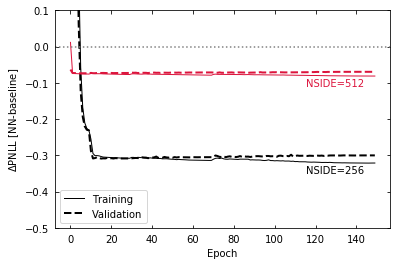

In [9]:
fig, ax = train_val_losses_256vs512(fig_path + 'eboss_data_ngc_trainval_losses_256vs512_main_all.pdf', 
                                    nchains=1, npartitions=1, alpha=1, sample='main', cap='NGC', maps='all')

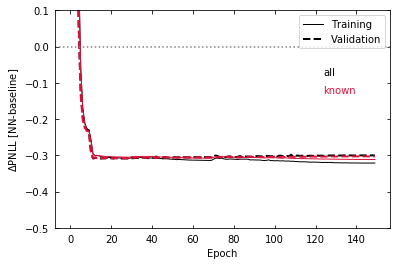

In [10]:
fig, ax = train_val_losses_allvsknown(fig_path + 'eboss_data_ngc_trainval_losses_allvsknown_main_256.pdf', 
                            nchains=1, npartitions=1, alpha=1, sample='main', nside='256', cap='NGC')
# ax.set_ylim(-1., 0.)

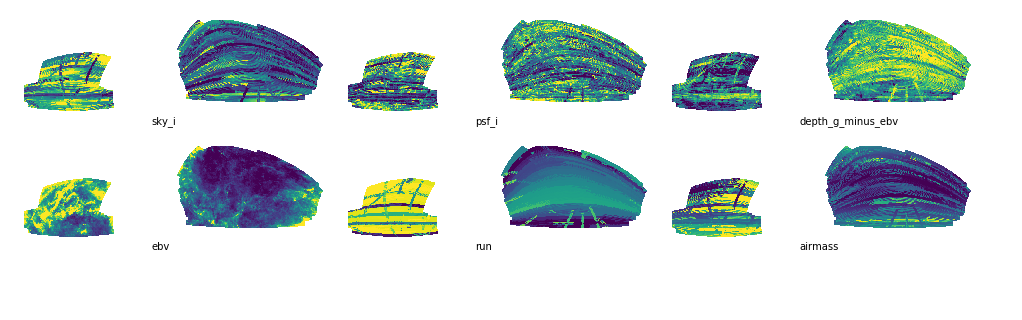

In [11]:
_=mollweide_templates(fig_path + 'eboss_data_templates.pdf')

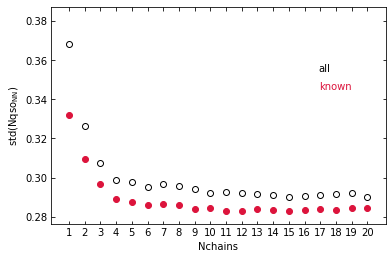

In [12]:
fig, ax = stdwnn_epoch(fig_path + 'eboss_ngc_256_stdwnn_epoch.pdf', cap='NGC', s='main', ns='256')

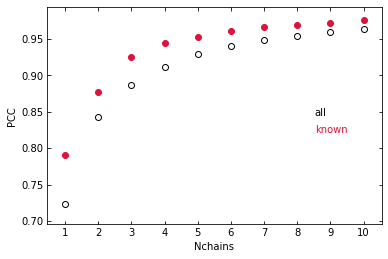

19
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

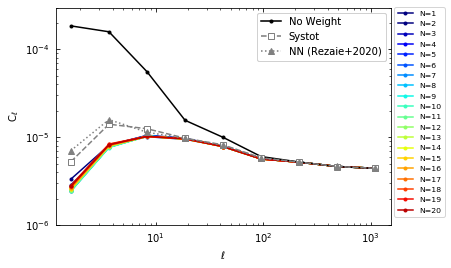

In [15]:
fig, ax = cell_ngc_main_nchain1(fig_path + 'eboss_ngc_main_known_nchain1.pdf')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

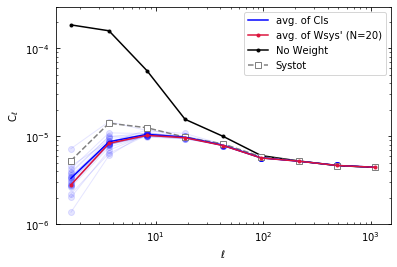

In [6]:
fig, ax = cell_ngc_main_nchain2(fig_path + 'eboss_ngc_main_known_nchain2.pdf')

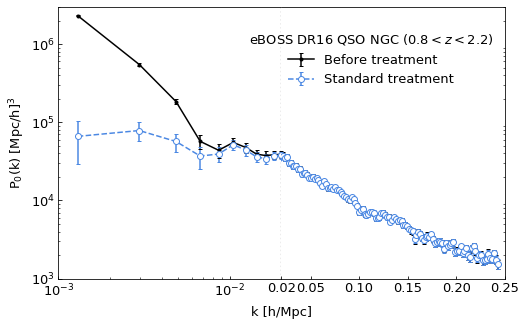

In [18]:
p0_demo(fig_path + 'p0_ngc_demo.png')

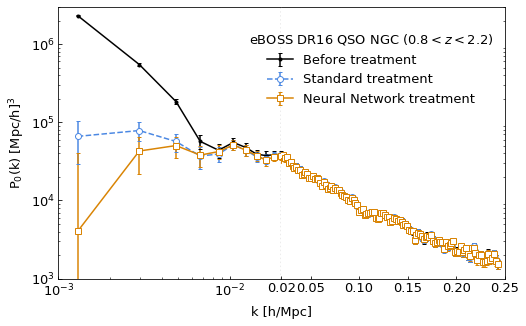

In [17]:
p0_demo(fig_path + 'p0_ngc_demo_wo_nn.png', show_nn=True)

................

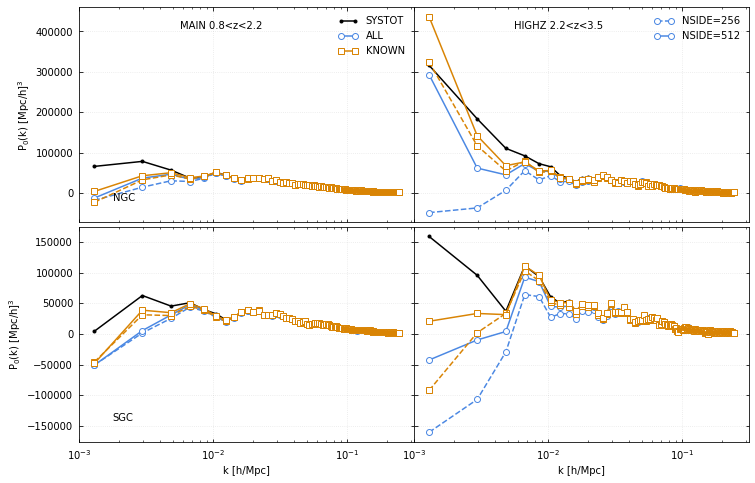

In [9]:
fig, ax = p0_512vs256_knownvsall_ngcvssgc(fig_path + 'eboss_p0_512vs256_mainhighz.pdf')

................

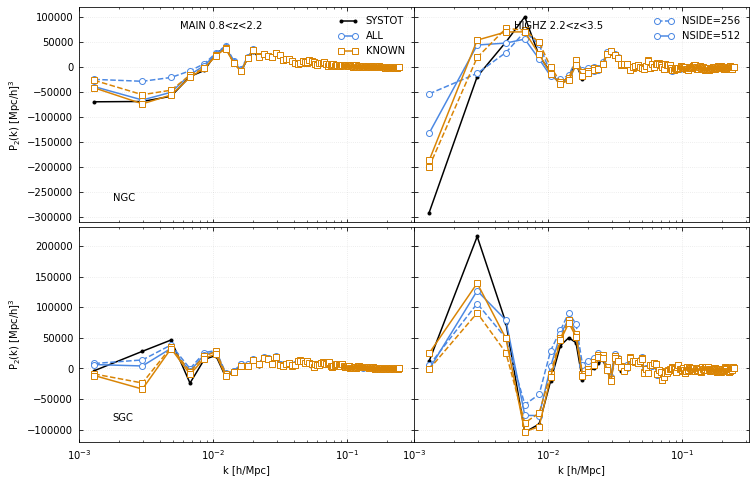

In [10]:
_ = p2_512vs256_knownvsall_ngcvssgc(fig_path + 'eboss_p2_512vs256_mainhighz.pdf')

........................NGC main 512 known 160.28548006082286
NGC main 512 all 175.25181297924783

NGC highz 512 known 104.22527975769806
NGC highz 512 all 95.6761345174035

-----
SGC main 512 known 92.93509541056501
SGC main 512 all 83.16032878934647

SGC highz 512 known 130.11237635500243
SGC highz 512 all 113.86945622005307

-----
NGC

-----

main 
512 
noweight &systot & known & all & &
 2566.1 & 205.4 & 160.3 & 175.3 & &

-----

highz 
512 
noweight &systot & known & all & &
 1752.0 & 121.6 & 104.2 & 95.7 & &
SGC

-----

main 
512 
noweight &systot & known & all & &
 5750.1 & 143.2 & 92.9 & 83.2 & &

-----

highz 
512 
noweight &systot & known & all & &
 2553.7 & 146.0 & 130.1 & 113.9 & &


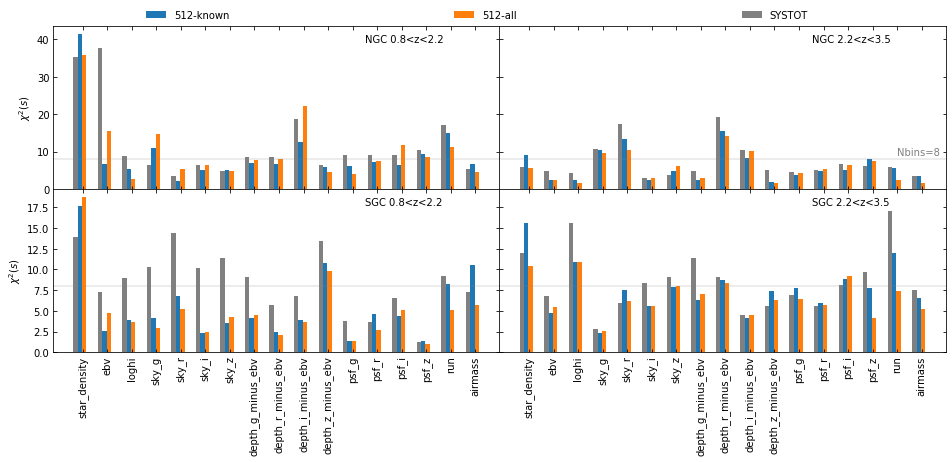

In [5]:
_ = chi2_from_nbar(fig_path + 'nbar_chi2.pdf')

........................................NGC main 512 known 161.8214953326367
NGC main 512 all 160.4495569313773
NGC main 256 known 148.46682128100497
NGC main 256 all 130.83170624150537

NGC highz 512 known 127.40698573759649
NGC highz 512 all 114.82938136215832
NGC highz 256 known 95.81685627959173
NGC highz 256 all 80.23154387324917

-----
SGC main 512 known 139.26188147108195
SGC main 512 all 129.58180280022378
SGC main 256 known 113.43784022722534
SGC main 256 all 110.13406408461424

SGC highz 512 known 116.73498632687905
SGC highz 512 all 108.5713294972113
SGC highz 256 known 92.31105176346297
SGC highz 256 all 79.11884972881556

-----
NGC

-----

main 
512 256 
noweight &systot & known & all & & known & all &
 1864.9 & 198.9 & 161.8 & 160.4 & & 148.5 & 130.8 &

-----

highz 
512 256 
noweight &systot & known & all & & known & all &
 1497.6 & 154.1 & 127.4 & 114.8 & & 95.8 & 80.2 &
SGC

-----

main 
512 256 
noweight &systot & known & all & & known & all &
 5212.1 & 187.8 & 139.3 

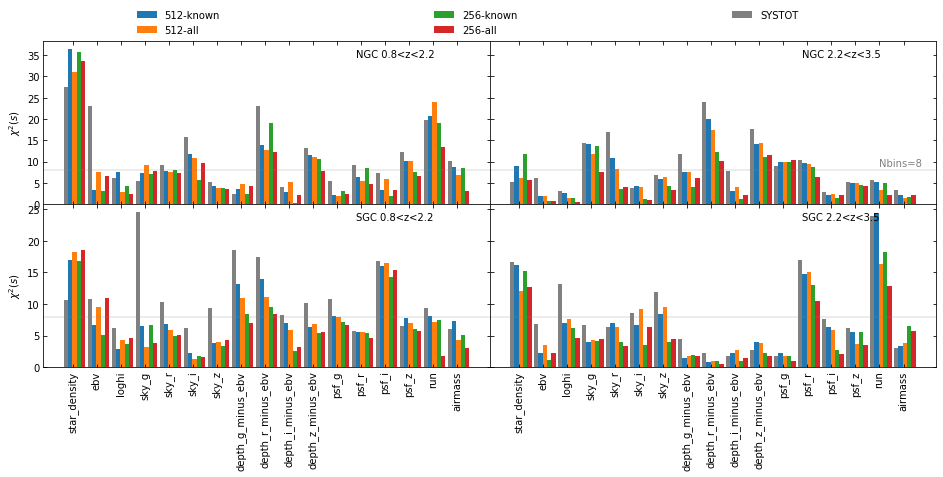

In [8]:
_ = chi2_from_nbar(fig_path + 'nbar_chi2.pdf')

........................................NGC main 512 known 154.40141046299982
NGC main 512 all 172.47742149172038
NGC main 256 known 231.84021116866865
NGC main 256 all 268.9014274331781

NGC highz 512 known 104.22527975769806
NGC highz 512 all 95.6761345174035
NGC highz 256 known 168.2606428766947
NGC highz 256 all 172.11947723033055

-----
SGC main 512 known 90.56471502095418
SGC main 512 all 81.93283271115398
SGC main 256 known 265.0908314384667
SGC main 256 all 232.93681848447744

SGC highz 512 known 130.11237635500243
SGC highz 512 all 113.86945622005307
SGC highz 256 known 192.29059298009471
SGC highz 256 all 173.93725288735598

-----
NGC

-----

main 
512 256 
noweight &systot & known & all & & known & all &
 2566.1 & 205.4 & 154.4 & 172.5 & & 231.8 & 268.9 &

-----

highz 
512 256 
noweight &systot & known & all & & known & all &
 1752.0 & 121.6 & 104.2 & 95.7 & & 168.3 & 172.1 &
SGC

-----

main 
512 256 
noweight &systot & known & all & & known & all &
 5750.1 & 143.2 & 90.6 

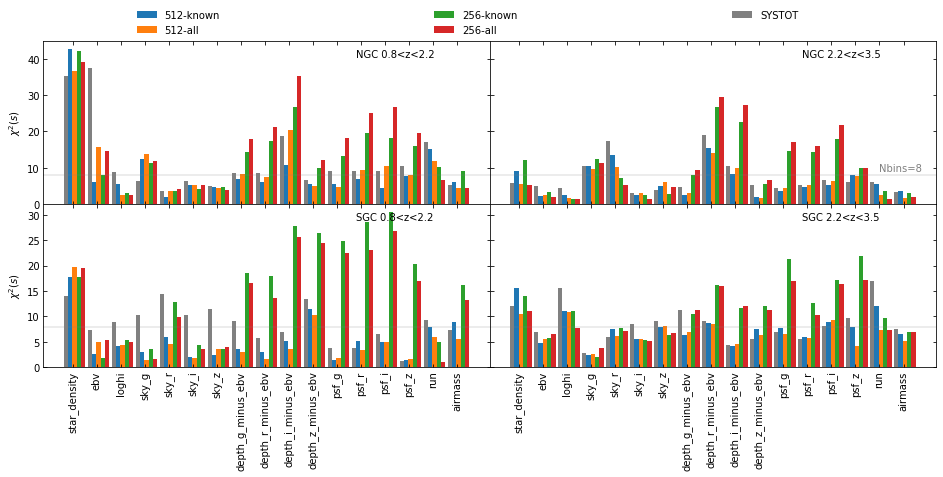

In [5]:
_ = chi2_from_nbar(fig_path + 'nbar_chi2.pdf')

........................................NGC main 512 known 154.40141046299982
NGC main 512 all 172.47742149172038
NGC main 256 known 148.46682128100497
NGC main 256 all 130.83170624150537

NGC highz 512 known 104.22527975769806
NGC highz 512 all 95.6761345174035
NGC highz 256 known 95.81685627959173
NGC highz 256 all 80.23154387324917

-----
SGC main 512 known 90.56471502095418
SGC main 512 all 81.93283271115398
SGC main 256 known 113.43784022722534
SGC main 256 all 110.13406408461424

SGC highz 512 known 130.11237635500243
SGC highz 512 all 113.86945622005307
SGC highz 256 known 92.31105176346297
SGC highz 256 all 79.11884972881556

-----
NGC

-----

main 
512 256 
noweight &systot & known & all & & known & all &
 2566.1 & 205.4 & 154.4 & 172.5 & & 148.5 & 130.8 &

-----

highz 
512 256 
noweight &systot & known & all & & known & all &
 1752.0 & 121.6 & 104.2 & 95.7 & & 95.8 & 80.2 &
SGC

-----

main 
512 256 
noweight &systot & known & all & & known & all &
 5750.1 & 143.2 & 90.6 & 8

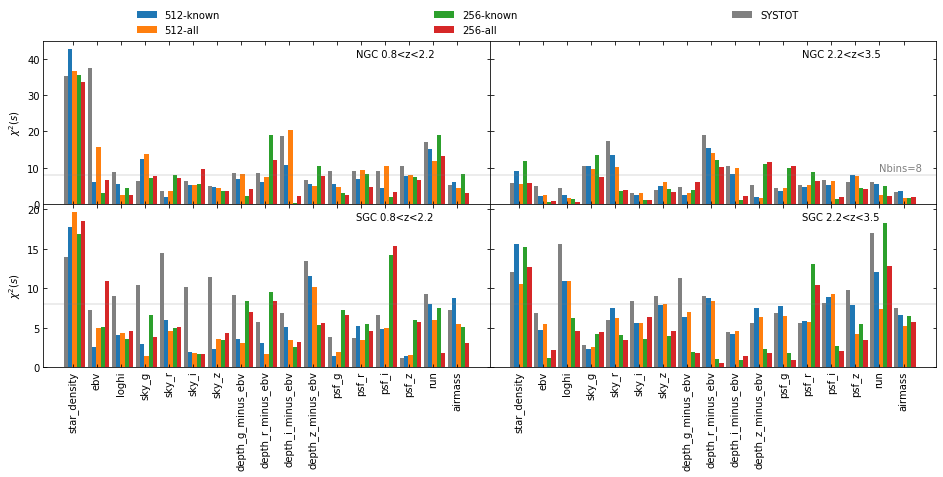

In [5]:
_ = chi2_from_nbar(fig_path + 'nbar_chi2.pdf')

In [101]:
%matplotlib inline
import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')
from lssutils.lab import histogram_cell

In [134]:
def read_cl(fn, ix=1, sf=1):
    
    cl = np.load(fn, allow_pickle=True).item()
    #l_, cl_ = cl['cl_sg'][ix]['l'], cl['cl_sg'][ix]['cl']
    
    #l_, cl_gg = histogram_cell(cl['cl_gg']['cl'])
    l_, cl_sg = histogram_cell(cl['cl_sg'][ix]['cl'])
    #l_, cl_ss = histogram_cell(cl['cl_ss'][ix]['cl'])
    
    return l_, cl_sg*sf


cl = {}

cl['noweight'] = read_cl('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/cl_sep10/cl_NGC_noweight_mainhighz_512_v7_2_main.npy', sf=0.2)
cl['systot'] = read_cl('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/cl_sep10/cl_NGC_knownsystot_mainhighz_512_v7_2_main.npy')
cl['nn'] = read_cl('/home/mehdi/data/eboss/data/v7_2/1.0/measurements/cl_sep10/cl_NGC_known_mainhighz_512_v7_2_main.npy')

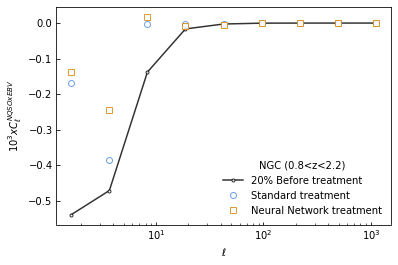

In [143]:
fig, ax = plt.subplots()

markers = {'noweight':'.',
         'systot':'o',
         'nn':'s'}

colors = {'noweight':'#000000',
         'systot':'#4b88e3',
         'nn':'#d98404'}

labels = {'noweight':'20% Before treatment',
         'systot':'Standard treatment',
         'nn':'Neural Network treatment'} 

sf = 1.0e3
for i, (name, cl_) in enumerate(cl.items()):
    
    ls = '-' if name=='noweight' else 'none'
    
    ax.plot(cl_[0], sf*cl_[1], label=labels[name], 
            marker=markers[name], color=colors[name],
            mfc='w', alpha=0.8, ls=ls
           )
    
    #chi2v = chi2_fn(nbar[1], nbar[2])
    #ax.text(0.7, 0.92-i*0.06, r'$\chi^{2}/dof$ = %.2f/%d'%(chi2v,len(nbar[1])),
    #        color=colors[name], transform=ax.transAxes)
    
ax.tick_params(direction='in', which='both', axis='both')    
# ax.axhline(0, ls=':', color='grey')    
ax.legend(title='NGC (0.8<z<2.2)', frameon=False)
# ax.set(xlabel='E(B-V)', ylabel=r'$\delta$')

ax.set(xscale='log', xlabel=r'$\ell$', ylabel=r'$10^{3}x C_{\ell}^{NQSO x EBV}$')
fig.savefig('cl_ngc_512.png', dpi=300, bbox_inches='tight')

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
clf = '/home/mehdi/data/eboss/data/v7_2/1.0/measurements/cl/cl_NGC_all_mainhighz_512_v7_2_main.npy'

cld = np.load(clf, allow_pickle=True).item()

In [4]:
cld.keys()

dict_keys(['cl_gg'])

In [5]:
cld['cl_gg'].keys()

dict_keys(['l', 'cl', 'cl_error', 'njack', 'lmax', 'cl_jackknifes', 'shotnoise'])

In [6]:
%matplotlib inline
import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')
from lssutils.lab import histogram_cell

In [7]:
lb, clb = histogram_cell(cld['cl_gg']['cl'])

(1e-07, 0.0001)

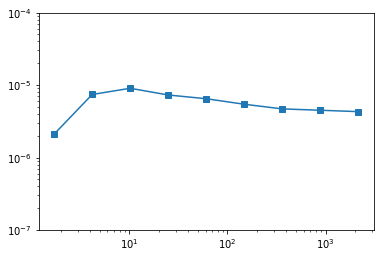

In [8]:
plt.loglog(lb, clb, marker='s')
plt.ylim(1.0e-7, 10e-5)

In [34]:
def __read_cl(cl_filename):
    d = np.load(cl_filename, allow_pickle=True).item()
    
    """
    dd = {}
    for i in range(len(d)):
        dname = d[i]['sys']
        dd[dname] = (d[i]['bin_avg'], d[i]['nnbar'], d[i]['nnbar_err'])
    """
    dd = histogram_cell(d['cl_gg']['cl'])
    
    return dd    



cls = {}

path_cl = '/home/mehdi/data/eboss/data/v7_2/1.0/measurements/cl/'

for cap in ['NGC', 'SGC']:
    for zbin in ['main', 'highz']:
        for maps in ['all', 'known']:
            for nside in ['256', '512']:

                name = '_'.join([cap, zbin, maps, nside])
                cls[name] = __read_cl(f'{path_cl}cl_{cap}_{maps}_mainhighz_{nside}_v7_2_{zbin}.npy')
                print('.', end='')

        cls[f'{cap}_{zbin}_systot'] = __read_cl(f'{path_cl}cl_{cap}_knownsystot_mainhighz_512_v7_2_{zbin}.npy')
        cls[f'{cap}_{zbin}_noweight'] = __read_cl(f'{path_cl}cl_{cap}_noweight_mainhighz_512_v7_2_{zbin}.npy')

................

In [35]:
cls.keys()

dict_keys(['NGC_main_all_256', 'NGC_main_all_512', 'NGC_main_known_256', 'NGC_main_known_512', 'NGC_main_systot', 'NGC_main_noweight', 'NGC_highz_all_256', 'NGC_highz_all_512', 'NGC_highz_known_256', 'NGC_highz_known_512', 'NGC_highz_systot', 'NGC_highz_noweight', 'SGC_main_all_256', 'SGC_main_all_512', 'SGC_main_known_256', 'SGC_main_known_512', 'SGC_main_systot', 'SGC_main_noweight', 'SGC_highz_all_256', 'SGC_highz_all_512', 'SGC_highz_known_256', 'SGC_highz_known_512', 'SGC_highz_systot', 'SGC_highz_noweight'])

In [36]:
cls['NGC_main_noweight']

(array([1.72028494e+00, 4.19847559e+00, 1.02466730e+01, 2.50077215e+01,
        6.10330916e+01, 1.48955524e+02, 3.63536365e+02, 8.87235900e+02,
        2.16536121e+03]),
 array([1.81932173e-04, 1.56560538e-04, 4.59850013e-05, 1.07456467e-05,
        7.69301069e-06, 5.57570597e-06, 4.68445045e-06, 4.47573655e-06,
        4.28090089e-06]))

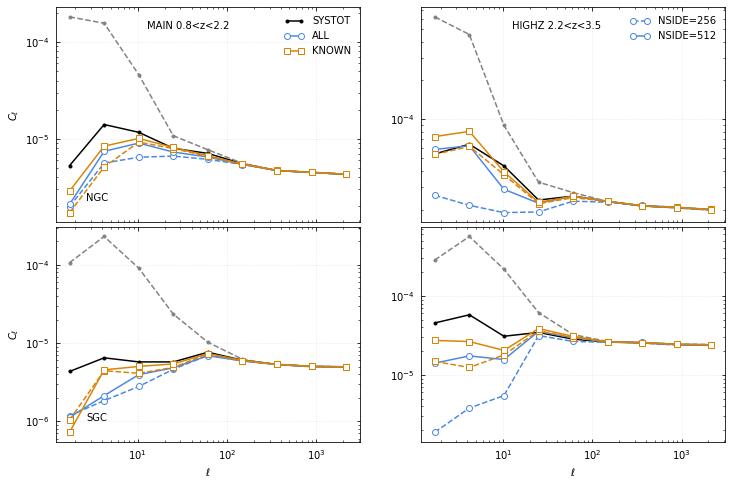

In [39]:
# creat figure
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8),
                      sharex=True) # sharey='row'
fig.subplots_adjust(hspace=0.02, wspace=0.2)
ax = ax.flatten()

# add cosmetics
for i, axi in enumerate(ax):
    axi.tick_params(direction='in', which='both', axis='both', 
                    pad=6, right=True, top=True)
    axi.set(xscale='log', yscale='log')
    axi.grid(True, ls=':', color='grey', alpha=0.2)

    if i in [0, 2]:
        axi.set_ylabel(r'$C_{\ell}$')
    if i in [2, 3]:
        axi.set_xlabel(r'$\ell$')


colors = {'all':'#4b88e3',
          'known':'#d98404',
          'systot':'#000000',
         'noweight':'#828282'}

markers = {'all':'o',
          'known':'s'}

styles = {'512':'-',
          '256':'--'}

rows = {'NGC':0,
        'SGC':1}

cols = {'main':0,
       'highz':1}

zlim = {'main':'0.8<z<2.2',
       'highz':'2.2<z<3.5'}

for cap in ['NGC', 'SGC']:
    for zbin in ['main', 'highz']:    

        ix, iy = rows[cap], cols[zbin]
        ik = ix*2+iy

        if ik < 2:
            ax[ik].text(0.3, 0.9, ' '.join([zbin.upper(), zlim[zbin]]), 
                       transform=ax[ik].transAxes)

        if ik in [0, 2]:
            ax[ik].text(0.1, 0.1, cap, transform=ax[ik].transAxes)

        lb = 'SYSTOT' if ik==0 else None
        ax[ik].plot(*cls[f'{cap}_{zbin}_systot'], ls='-', 
                    color=colors['systot'], marker='.', label=lb, zorder=-1)
        ax[ik].plot(*cls[f'{cap}_{zbin}_noweight'], ls='--', 
                    color=colors['noweight'], marker='.', zorder=-1)        

        for maps in ['all', 'known']:
            for nside in ['256', '512']:

                name = '_'.join([cap, zbin, maps, nside])

                ls = styles[nside]
                color = colors[maps]
                mk = markers[maps]

                if (ik==1) and (maps=='all'):
                    lb = 'NSIDE=%s'%nside  
                elif (ik==0) and (nside=='512'):
                    lb = '%s'%(maps.upper())
                else:
                    lb = None

                ax[ik].plot(*cls[name], ls=ls, color=color, marker=mk, mfc='w', label=lb)

for ik in [0, 1]:
    ax[ik].legend(frameon=False, numpoints=2)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import nbodykit.lab as nb

In [6]:
def read_nbodykit(path):
    
    files = glob(path)
    
    pk_k = []
    
    print(len(files))
    
    for pk_fn in files:
        pk_ = nb.ConvolvedFFTPower.load(pk_fn)
        k = pk_.poles['k']
        pk_k.append(pk_.poles['power_0']-pk_.attrs['shotnoise'])
        
    pk_k = np.array(pk_k).T
    return (k, pk_k)

    
    
    
maps = 'known'
nside = '512'

path = '/home/mehdi/data/eboss/mocks/1.0/measurements/spectra/'

pk = {}
pk['cont'] = read_nbodykit(f'{path}spectra_NGC_noweight_mainhighz_512_v7_1_*_main.json')
pk['null'] = read_nbodykit(f'{path}spectra_NGC_knownsystot_mainhighz_512_v7_0_*_main.json')
pk['cont+standard'] = read_nbodykit(f'{path}spectra_NGC_knownsystot_mainhighz_512_v7_1_*_main.json')

for maps in ['known', 'all']:
    for nside in ['256', '512']:        
        pk[f'null+nn+{maps}+{nside}'] = read_nbodykit(f'{path}spectra_NGC_{maps}_mainhighz_{nside}_v7_0_*_main.json')
        pk[f'cont+nn+{maps}+{nside}'] = read_nbodykit(f'{path}spectra_NGC_{maps}_mainhighz_{nside}_v7_1_*_main.json')

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [ ]:
fig, ax = plt.subplots()

c_ = [plt.cm.jet(i/4) for i in range(5)]
i  = 0
for m in ['null', 'cont', 'cont+standard']:
    ax.plot(pk[m][0], pk[m][1][:, :100].mean(axis=1)+4.0e4, color=c_[i], label=m)
    ax.plot(pk[m][0], pk[m][1][:, :].mean(axis=1)+4.0e4, ls='--', color=c_[i])
    
    i += 1

    

m1 = f'null+nn+all+512'
m2 = f'cont+nn+all+512'
ax.plot(pk[m1][0], pk[m1][1][:, :100].mean(axis=1)+4.0e4, label=m1, color=c_[i])
ax.plot(pk[m1][0], pk[m1][1][:, :].mean(axis=1)+4.0e4, ls='--', color=c_[i])    

i+=1

ax.plot(pk[m2][0], pk[m2][1][:, :100].mean(axis=1)+4.0e4, label=m2, color=c_[i])
ax.plot(pk[m2][0], pk[m2][1][:, :].mean(axis=1)+4.0e4, ls='--', color=c_[i])

ax.legend()
ax.set(xscale='log', xlabel='k [h/Mpc]', ylabel=r'$P_{0}$', yscale='log')

fig.savefig('p0_100_1k.png', dpi=300, bbox_inches='tight')

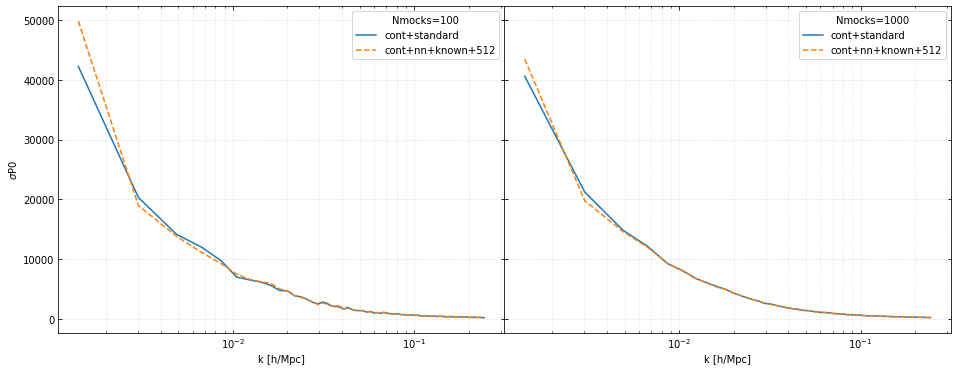

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)
fig.subplots_adjust(hspace=0, wspace=0.0)

ls = 4*['-', '--', '-.', ':']
c_ = [plt.cm.jet(i/10) for i in range(11)]


#cases = ['null', 'cont', 'cont+standard', 
#                        'null+nn+all+512', 'cont+nn+all+512',
#                       'null+nn+known+512', 'cont+nn+known+512',
#                       'null+nn+all+256', 'cont+nn+all+256',
#                       'null+nn+known+256', 'cont+nn+known+256']

cases = ['cont+standard', 'cont+nn+known+512']
for i, m in enumerate(cases):
    
    
    pki = pk[m]
    
    ax[0].plot(pki[0], np.std(pki[1][:, :100], axis=1, ddof=1), label=m, ls=ls[i])#, color=c_[i])
    ax[1].plot(pki[0], np.std(pki[1], axis=1, ddof=1), label=m, ls=ls[i])#, color=c_[i])

for (axi, n) in zip(ax, [100, 1000]):
    
    axi.tick_params(direction='in', which='both', axis='both', top=True, right=True)
    axi.grid(which='both', ls=':', alpha=0.5)    
    axi.legend(fontsize=10, title='Nmocks=%d'%n)    
    axi.set(xscale='log', xlabel='k [h/Mpc]') # yscale='log',
    
ax[0].set_ylabel(r'$\sigma$P0')
fig.savefig('sigp0v2.png', dpi=300, bbox_inches='tight')

[Text(0, 0.5, '$\\Delta$P0/P0'), None, Text(0.5, 0, 'k [h/Mpc]')]

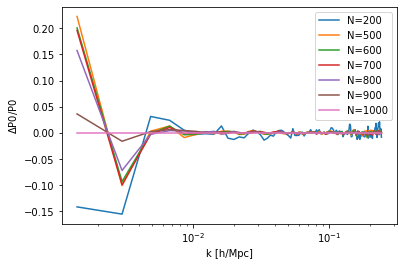

In [16]:
fig, ax = plt.subplots()

p_t = np.mean(pk['null'][1][:, :], axis=1)


for i, ix in enumerate([200, 500, 600, 700, 800, 900, 1000]):
        
    p_2 = np.mean(pk['null'][1][:, :ix], axis=1)
    
    ax.plot(pk['null'][0], (p_2-p_t)/p_t, label='N=%d'%ix)
    

ax.legend()
ax.set(xscale='log', 
       xlabel='k [h/Mpc]',
       ylabel=r'$\Delta$P0/P0')

No handles with labels found to put in legend.


[None, Text(0, 0.5, '$\\sigma$'), None, Text(0.5, 0, 'k [h/Mpc]')]

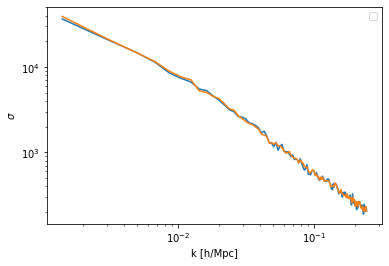

In [23]:
fig, ax = plt.subplots()

for i, ix in enumerate([100, 200]):
        
    p_2 = np.std(pk['null'][1][:, :ix], axis=1, ddof=1)
    
    ax.plot(pk['null'][0], p_2)
    

ax.legend()
ax.set(xscale='log', xlabel='k [h/Mpc]', yscale='log', 
       ylabel=r'$\sigma$')#ylim=(-1000, 33000))

[Text(0, 0.5, '$|P_{X}/P_{\\rm null}-1|$'), None, Text(0.5, 0, 'k [h/Mpc]')]

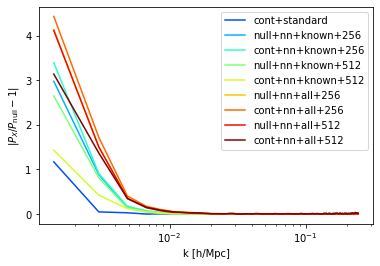

In [3]:
fig, ax = plt.subplots()

for i, m in enumerate(pk.keys()):
    if (m == 'null') | (m == 'cont'):
        continue
        
    p_1 = pk[m][1].mean(axis=1)
    p_2 = pk['null'][1].mean(axis=1)
    
    dp = abs(p_1/p_2-1.)
    ax.plot(pk['null'][0], dp,
            label=m, c=plt.cm.jet(i/10))
    

ax.legend()
ax.set(xscale='log', xlabel='k [h/Mpc]', ylabel=r'$|P_{X}/P_{\rm null}-1|$')#ylim=(-1000, 33000))

[Text(0, 0.5, '$|\\Delta P_{0}/P_{0}|$'), None, Text(0.5, 0, 'k [h/Mpc]')]

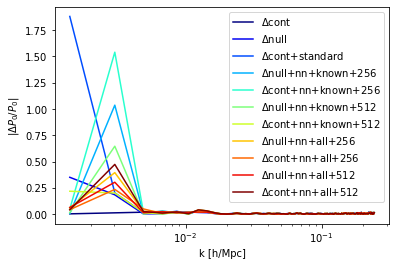

In [4]:
fig, ax = plt.subplots()

for i, m in enumerate(pk.keys()):

    p_1 = pk[m][1][:, :].mean(axis=1)
    p_2 = pk[m][1][:, :100].mean(axis=1)
    
    dp = abs((p_2/p_1)-1.)
    ax.plot(pk['null'][0], dp,
            label=r'$\Delta$%s'%m, c=plt.cm.jet(i/10))
    

ax.legend()
ax.set(xscale='log', xlabel='k [h/Mpc]', ylabel=r'$|\Delta P_{0}/P_{0}|$')

In [22]:
pk['null+nn+all+512'][1].shape

(128, 1000)

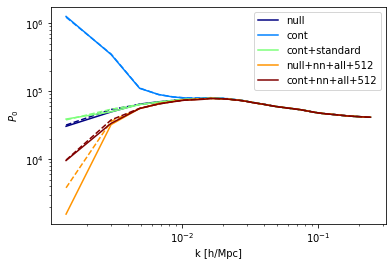

In [30]:
fig, ax = plt.subplots()

c_ = [plt.cm.jet(i/4) for i in range(5)]
i  = 0
for m in ['null', 'cont', 'cont+standard']:
    ax.plot(pk[m][0], pk[m][1][:, :100].mean(axis=1)+4.0e4, color=c_[i], label=m)
    ax.plot(pk[m][0], pk[m][1][:, :].mean(axis=1)+4.0e4, ls='--', color=c_[i])
    
    i += 1

    

m1 = f'null+nn+all+512'
m2 = f'cont+nn+all+512'
ax.plot(pk[m1][0], pk[m1][1][:, :100].mean(axis=1)+4.0e4, label=m1, color=c_[i])
ax.plot(pk[m1][0], pk[m1][1][:, :].mean(axis=1)+4.0e4, ls='--', color=c_[i])    

i+=1

ax.plot(pk[m2][0], pk[m2][1][:, :100].mean(axis=1)+4.0e4, label=m2, color=c_[i])
ax.plot(pk[m2][0], pk[m2][1][:, :].mean(axis=1)+4.0e4, ls='--', color=c_[i])

ax.legend()
ax.set(xscale='log', xlabel='k [h/Mpc]', ylabel=r'$P_{0}$', yscale='log')

fig.savefig('p0_100_1k.png', dpi=300, bbox_inches='tight')

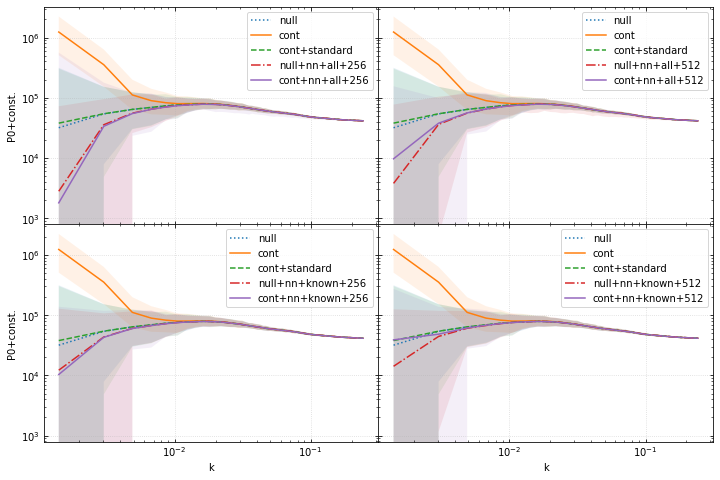

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8), sharex=True,
                      sharey=True)

fig.subplots_adjust(hspace=0, wspace=0)
ax = ax.flatten()

ls = 3*[':', '-', '--', '-.', '-']


for axi in ax:
    i = 0
    for m in ['null', 'cont', 'cont+standard']:
        axi.plot(pk[m][0], pk[m][1].mean(axis=1)+4.0e4, label=m, ls=ls[i])
        y_min, y_max = np.percentile(pk[m][1], [0, 100], axis=1)
        axi.fill_between(pk[m][0], y_min+4.0e4, y_max+4.0e4, alpha=0.1)
        i += 1

i = 0    
for maps in ['all', 'known']:
    for nside  in ['256', '512']:
        j = 3 
        for iscont in ['null', 'cont']:
            m1 = f'{iscont}+nn+{maps}+{nside}'
            ax[i].plot(pk[m1][0], pk[m1][1].mean(axis=1)+4.0e4, label=m1, ls=ls[j])
            y_min, y_max = np.percentile(pk[m1][1], [0, 100], axis=1)
            ax[i].fill_between(pk[m1][0], y_min+4.0e4, y_max+4.0e4, alpha=0.1)
            j += 1



        i+= 1
        
for axi in ax:
    axi.tick_params(direction='in', which='both', axis='both', top=True, right=True)
    axi.set(xscale='log', yscale='log')
    axi.legend()
    axi.grid(True, ls=':', alpha=0.5)
    
for i in [0, 2]:
    ax[i].set_ylabel('P0+const.')
    
for i in [2, 3]:
    ax[i].set_xlabel('k')
    
fig.savefig('p0mocks.png', dpi=300, bbox_inches='tight')

In [31]:
metrics_0 = np.load('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/512/main/nn_pnllwocos_known/metrics.npz', 
                  allow_pickle=True)

In [32]:
metrics_1 = np.load('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/512/main/nn_pnnl_known/metrics.npz', 
                  allow_pickle=True)

In [47]:
val_0 = np.array(metrics_0['losses'].item()['valid']).reshape(-1, 150)
val_1 = np.array(metrics_1['losses'].item()['valid']).reshape(-1, 150)

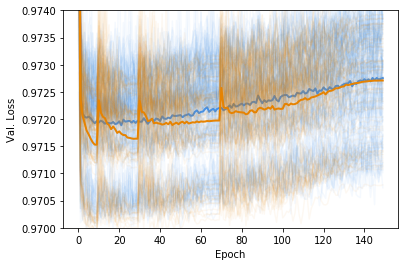

In [62]:
for val_j in val_0:
    plt.plot(val_j, color='#4292ed', alpha=0.05)
    
plt.plot(np.mean(val_0, axis=0), color='#4292ed', lw=2)        
        
for val_j in val_1:
    plt.plot(val_j, color='#e68302', alpha=0.05)   

plt.plot(np.mean(val_1, axis=0), color='#e68302', lw=2)            
plt.ylim(0.97, 0.974)        

plt.ylabel('Val. Loss')
plt.xlabel('Epoch')
# plt.xscale('log')
# plt.xlim(xmin=1)
plt.savefig('loss_pnll_wocosnn.png', dpi=300, bbox_inches='tight')

In [61]:
def p0mocks(maps, nside, ax=None):
    path = '/home/mehdi/data/eboss/mocks/1.0/measurements/spectra/'
    pkc = glob(f'{path}spectra_NGC_noweight_mainhighz_512_v7_1_*_main.json')
    pk0 = glob(f'{path}spectra_NGC_knownsystot_mainhighz_512_v7_0_*_main.json')
    pk1 = glob(f'{path}spectra_NGC_knownsystot_mainhighz_512_v7_1_*_main.json')
    pk0n = glob(f'{path}spectra_NGC_{maps}_mainhighz_{nside}_v7_0_*_main.json')
    pk1n = glob(f'{path}spectra_NGC_{maps}_mainhighz_{nside}_v7_1_*_main.json')


    if ax is None:
        fig, ax = plt.subplots()

    c = ['green', 'grey', 'blue', 'orange', 'red']

    ls = 2*[':', '-', '--', '-.', '-']
    i = 0
    for ni, pk_list in zip(['Cont', 'Null', 'Cont+Standard', f'Null+NN', f'Cont+NN'],
                       [pkc, pk0, pk1, pk0n, pk1n]):
        pk_k = []
        print(ni, len(pk_list))
        for pk_fn in pk_list:
            pk_ = nb.ConvolvedFFTPower.load(pk_fn)

            ki = pk_.poles['k']
            pk_i= pk_.poles['power_0'].real-pk_.attrs['shotnoise']+1.0e5
            pk_k.append(pk_i)

        ax.plot(ki, np.mean(pk_k, axis=0), color=c[i], alpha=1, label=ni, ls=ls[i])
        ax.fill_between(ki, *np.percentile(pk_k, [0, 100], axis=0), color=c[i], alpha=0.1)
        i += 1

    #ax.grid(ls=':', color='grey', alpha=0.4)
    #ax.set(xscale='log', yscale='log', xlabel='k', ylabel='P0')
    #ax.set_ylim(1.0e2, 2.0e6)
    #ax.legend()
    return ax

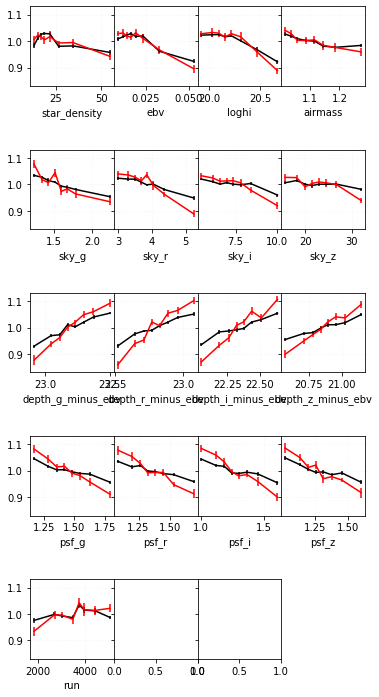

In [59]:
fig, ax = plt.subplots(ncols=4, nrows=5, sharey=True, figsize=(6, 12))
fig.subplots_adjust(wspace=0, hspace=0.8)
ax = ax.flatten()
fig.delaxes(ax[-1])

sysm_names = ['star_density',
 'ebv',
 'loghi',
 'airmass',              
 'sky_g',
 'sky_r',
 'sky_i',
 'sky_z',
 'depth_g_minus_ebv',
 'depth_r_minus_ebv',
 'depth_i_minus_ebv',
 'depth_z_minus_ebv',
 'psf_g',
 'psf_r',
 'psf_i',
 'psf_z',
 'run']

colors = ['k', 'r']

for i, sysm_n in enumerate(sysm_names):
    
    for j, zbin in enumerate(['main', 'highz']):
        
        ax[i].errorbar(*nnbars[f'NGC_{zbin}_noweight'][sysm_n], color=colors[j])
        
    ax[i].set(xlabel=sysm_n)
    ax[i].grid(True, ls=':', color='grey', alpha=0.1)

In [10]:
chi2s = {}
chi2s['256'] = get_chi2pdf('256')

len(nbars): 1000
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [11]:
chi2s['512'] = get_chi2pdf('512')

chi2d  = {'systot':205.4, 
          'NN-known(512)':154.4,
          'NN-all(512)':172.5}


x_ = np.arange(50, 250)


fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_, chi2.pdf(x_, df=136), 'r--', zorder=-1, label='PDF(dof=136)', lw=0.7)
ax.plot(x_, chi2.pdf(x_, df=147.4), 'r-', zorder=-1, label='PDF(dof=147.4)', lw=0.7)

patches = []
for n,v in chi2s.items():
    _,_, p = ax.hist(v, bins=40, density=True, range=(80, 270), 
            histtype='step', label='Mocks (NSIDE=%s)'%n, zorder=10)
    patches.append(p[0])



ls = ['-', '-.', ':']
i = 0
for n,v in chi2d.items():
    ax.axvline(v, zorder=-1, color='k', 
               ls=ls[i], label='Data %s'%n, alpha=0.5, lw=1)
    i += 1    
    
lines = ax.get_lines()

legend1 = plt.legend(lines[:-3], [r'$\chi^{2}$(dof=136)', r'$\chi^{2}$(dof=147.4)'], loc=1, 
                     bbox_to_anchor=(1, 0.8), frameon=False)
legend2 = plt.legend(lines[-3:], ["Data Systot", "Data NN-Known(512)", "Data NN-all (512)"], loc=1)
legend3 = plt.legend(patches, [ 'Mocks(256)', 'Mocks(512)'], loc=5, frameon=False)
ax.add_artist(legend1)
ax.add_artist(legend2)    

ax.set_xlabel(r'$\chi^{2}$')

len(nbars): 1000
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [93]:
from nbodykit.lab import ConvolvedFFTPower

In [110]:
pks = {}
for cap in ['NGC', 'SGC']:
    
    pks[f'systot_{cap}'] = ConvolvedFFTPower.load(f'/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/spectra_{cap}_knownsystot_mainhighz_512_v7_2_main.json')
    
    for maps in ['known', 'all']:
        pks[f'1z_256_{cap}_{maps}'] = ConvolvedFFTPower.load(f'/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/spectra_{cap}_{maps}_mainhighz_256_v7_2_main.json')
        pks[f'1z_512_{cap}_{maps}'] = ConvolvedFFTPower.load(f'/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/spectra_{cap}_{maps}_mainhighz_512_v7_2_main.json')
        pks[f'2z_512_{cap}_{maps}'] = ConvolvedFFTPower.load(f'/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/spectra_{cap}_{maps}_lowmidhighz_512_v7_2_main.json')

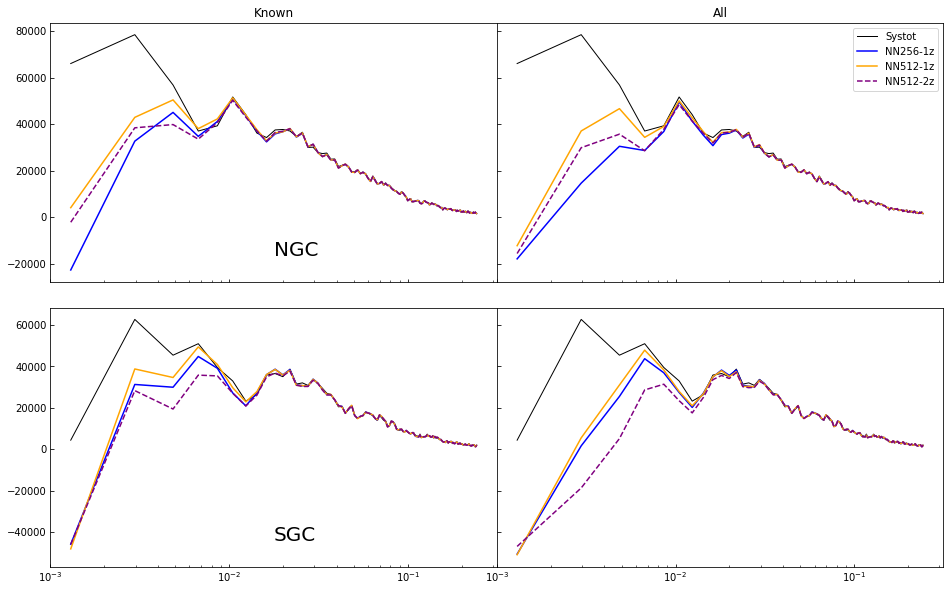

In [136]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16, 10), 
                       sharey='row', sharex=True)
fig.subplots_adjust(wspace=0, hspace=0.1)

colors = ['b', 'orange']

for i, cap in enumerate(['NGC', 'SGC']):
    
    pki = pks[f'systot_{cap}']    
    for j in range(2):
        ax[i][j].plot(pki.poles['k'], pki.poles['power_0'].real-pki.attrs['shotnoise'], 
                      color='k', lw=1, label='Systot')

    for j, maps in enumerate(['known', 'all']):
        pki = pks[f'1z_256_{cap}_{maps}']
        ax[i][j].plot(pki.poles['k'], pki.poles['power_0'].real-pki.attrs['shotnoise'], 
                      color='b', label='NN256-1z')

        pki = pks[f'1z_512_{cap}_{maps}']
        ax[i][j].plot(pki.poles['k'], pki.poles['power_0'].real-pki.attrs['shotnoise'], 
                      color='orange', label='NN512-1z')

        pki = pks[f'2z_512_{cap}_{maps}']
        ax[i][j].plot(pki.poles['k'], pki.poles['power_0'].real-pki.attrs['shotnoise'], 
                      color='purple', ls='--', label='NN512-2z')


    
ax[0][1].legend()
ax[0][0].set(xscale='log') 

ax[0][0].set_title('Known')
ax[0][1].set_title('All')

ax[0][0].text(0.5, 0.1, 'NGC', transform=ax[0][0].transAxes, fontsize=20)
ax[1][0].text(0.5, 0.1, 'SGC', transform=ax[1][0].transAxes, fontsize=20)

for axi in ax.flatten():
    axi.tick_params(direction='in', which='both', axis='both')
    
# for n,v in pks.items():
#     plt.plot(v.poles['k'], v.poles['power_0'], label=n)
# plt.legend()
# plt.xscale('log')
# plt.xlabel('k')
# plt.ylabel('P0')

In [8]:
import matplotlib.pyplot as plt
import fitsio as ft
import numpy as np
from scipy.stats import spearmanr, pearsonr

In [ ]:
import lssutils.utils as ut

In [11]:
dm = ft.read('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/512/main/ngal_eboss_main_512.fits')
dh = ft.read('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/512/highz/ngal_eboss_highz_512.fits')

In [12]:
def __pcc(xc, yc, kind='spearman'):
    if not kind in ['pearson', 'spearman']:
        raise ValueError(f'{kind} not defined')
    elif kind == 'pearson':
        func = pearsonr
    elif kind == 'spearman':
        func = spearmanr
        
    pcc = []
    for j in range(xc.shape[1]):
        pcc.append(func(xc[:,j], yc)[0])
    return pcc

def pcc(xc, yc, return_err=False, 
        num=100, kind='pearson', seed=42, 
        verbose=False):
   
    pcc_ = __pcc(xc, yc)
    ret = (pcc_, )
    
    if return_err:
        
        np.random.seed(42)
        pcc_err = []
        
        for _ in range(num):
            pcc_err.append(__pcc(xc, np.random.permutation(yc)))
            
            if verbose:print('.',end='')
        ret += (pcc_err, )
    
    return ret

In [13]:
pcc_m = pcc(dm['features'], dm['label'], num=50, return_err=True, verbose=True)
pcc_h = pcc(dh['features'], dh['label'], num=50, return_err=True, verbose=True)

....................................................................................................

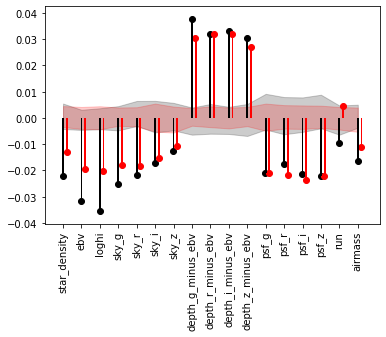

In [19]:
cr = ['k', 'r']

fig, ax = plt.subplots()

x_ = np.arange(17)

for i, pcc_i in enumerate([pcc_m, pcc_h]):
        
    lbound, ubound = np.percentile(pcc_i[1], [0, 100], axis=0)
    
    
    ax.bar(x_+i*0.2, pcc_i[0], width=0.1, color=cr[i])
    ax.scatter(x_+i*0.2-0.01, pcc_i[0], marker='o', color=cr[i])
    ax.fill_between(x_, lbound, ubound, alpha=0.2, color=cr[i])
    
ax.set_xticks(x_)
_=ax.set_xticklabels(ut.maps_eboss_v7p2, rotation=90)

In [42]:
corrm = ut.corrmat(dm['features'])

In [50]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

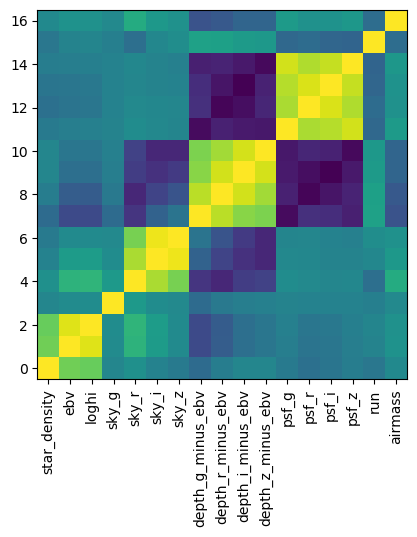

In [54]:
plt.imshow(corrm, origin='lower')
_=plt.xticks(x_, ut.maps_eboss_v7p2, rotation=90)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

................

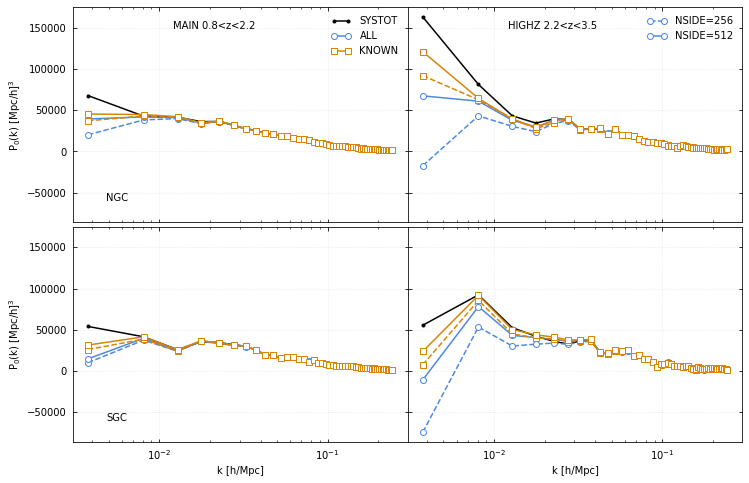

In [45]:
import nbodykit.lab as nb
def read_pk(filename):
    pk = nb.ConvolvedFFTPower.load(filename)
    return (pk.poles['k'], pk.poles['power_0']-pk.attrs['shotnoise'])

pks = {}

path_spectra = '/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/'

for cap in ['NGC', 'SGC']:
    for zbin in ['main', 'highz']:
        
        for maps in ['all', 'known']:
            for nside in ['256', '512']:
                            
                name = '_'.join([cap, zbin, maps, nside])
                pks[name] = read_pk(f'{path_spectra}spectra_{cap}_{maps}_mainhighz_{nside}_v7_2_{zbin}.json')
                print('.', end='')
                
        pks[f'{cap}_{zbin}_systot'] = read_pk(f'{path_spectra}spectra_{cap}_knownsystot_mainhighz_512_v7_2_{zbin}.json')
        
        

# creat figure
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 8),
                      sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.02, wspace=0)
ax = ax.flatten()

# add cosmetics
for i, axi in enumerate(ax):
    axi.tick_params(direction='in', which='both', axis='both', 
                    pad=6, right=True, top=True)
    axi.set(xscale='log')
    axi.grid(True, ls=':', color='grey', alpha=0.2)
    
    if i in [0, 2]:
        axi.set_ylabel(r'P$_{0}$(k) [Mpc/h]$^{3}$')
    if i in [2, 3]:
        axi.set_xlabel(r'k [h/Mpc]')
        
        
colors = {'all':'#4b88e3',
          'known':'#d98404',
          'systot':'#000000'}

markers = {'all':'o',
          'known':'s'}

styles = {'512':'-',
          '256':'--'}

rows = {'NGC':0,
        'SGC':1}

cols = {'main':0,
       'highz':1}
        
zlim = {'main':'0.8<z<2.2',
       'highz':'2.2<z<3.5'}

for cap in ['NGC', 'SGC']:
    for zbin in ['main', 'highz']:    
        
        ix, iy = rows[cap], cols[zbin]
        ik = ix*2+iy
        
        if ik < 2:
            ax[ik].text(0.3, 0.9, ' '.join([zbin.upper(), zlim[zbin]]), 
                       transform=ax[ik].transAxes)
            
        if ik in [0, 2]:
            ax[ik].text(0.1, 0.1, cap, transform=ax[ik].transAxes)
        
        lb = 'SYSTOT' if ik==0 else None
        ax[ik].plot(*pks[f'{cap}_{zbin}_systot'], ls='-', 
                    color=colors['systot'], marker='.', label=lb)
        
        for maps in ['all', 'known']:
            for nside in ['256', '512']:

                name = '_'.join([cap, zbin, maps, nside])
                                
                ls = styles[nside]
                color = colors[maps]
                mk = markers[maps]
                
                if (ik==1) and (maps=='all'):
                    lb = 'NSIDE=%s'%nside  
                elif (ik==0) and (nside=='512'):
                    lb = '%s'%(maps.upper())
                else:
                    lb = None
                    
                ax[ik].plot(*pks[name], ls=ls, color=color, marker=mk, mfc='w', label=lb)

for ik in [0, 1]:
    ax[ik].legend(frameon=False, numpoints=2)
    


In [80]:
rmse_256_old = np.load('/home/mehdi/data/eboss/data/v7_2/0.5/old/results/NGC_all_256/regression/nn_plain/raw/rank_0.npz', allow_pickle=True)
rmse_512_old = np.load('/home/mehdi/data/eboss/data/v7_2/0.3/old/results/NGC_all_512/regression/nn_plain/raw/rank_0.npz', allow_pickle=True)

[Text(0, 0.5, '$\\Delta$MSE [NN-baseline]'), Text(0.5, 0, 'Epoch')]

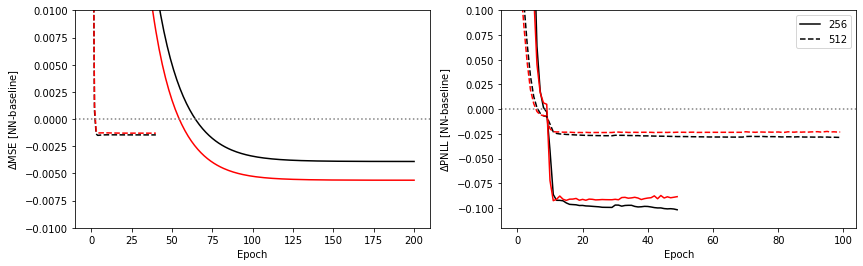

In [115]:
fig, (ax1, ax) = plt.subplots(ncols=2, figsize=(14, 4))

j = 0
ls = ['-', '--']
for nside in ['256', '512']:
    
    metrics = np.load('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/'\
                      +nside+'/main/nn_pnnl_all/metrics.npz', allow_pickle=True)
    
    taining_loss = metrics['losses'].item()['train']
    valid_loss = metrics['losses'].item()['valid']
    
    base_train_loss = metrics['stats'].item()[0]['base_train_loss']
    base_val_loss = metrics['stats'].item()[0]['base_val_loss']

    for i in range(1):
        ax.plot(np.array(taining_loss[0][i])-base_train_loss, color='k', ls=ls[j], label=nside)
        ax.plot(np.array(valid_loss[0][i])-base_val_loss, color='r', ls=ls[j])
    j += 1
ax.set_ylim(-0.12, 0.1)
ax.axhline(0, ls=':', color='grey')
ax.set(xlabel='Epoch', ylabel=r'$\Delta$PNLL [NN-baseline]')
ax.legend()


i = 0
ls = ['-', '--']

for rmse_nside in [rmse_256_old, rmse_512_old]:
    
    rmse_nside_i = rmse_nside['arr_0'].item()['epoch_MSEs']
    base_train, base_val, base_test = rmse_nside['arr_0'].item()['options']['baselineMSE']

    ax1.plot(rmse_nside_i[0][2][:, 0], rmse_nside_i[0][2][:, 1]-base_train, color='k', ls=ls[i])
    ax1.plot(rmse_nside_i[0][2][:, 0], rmse_nside_i[0][2][:, 2]-base_val, color='r', ls=ls[i])
    
    i += 1
    
ax1.set_ylim(-0.01, 0.01)
ax1.axhline(0, ls=':', color='grey')
ax1.set(xlabel='Epoch', ylabel=r'$\Delta$MSE [NN-baseline]')

In [2]:
import pandas as pd

In [3]:
from LSSutils.utils import corrmatrix

In [4]:
df = pd.read_hdf('/home/mehdi/data/templates/SDSS_WISE_HI_imageprop_nside512.h5', key='templates')
df.dropna(inplace=True)
corr = corrmatrix(df.values)

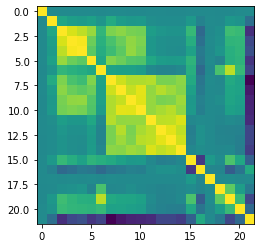

In [5]:
plt.imshow(corr)